# **ANALISIS SENTIMEN ULASAN APLIKASI INDODAX DI GOOGLE PLAY STORE**

# **Import Libraries**

In [1]:
!pip install sastrawi nltk emoji unidecode langdetect tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=87ee9374a1cfd15ac169fae0af8066f2da32913ed1f49e29acf8ef00b4345a4c
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import emoji
from IPython.display import display
from langdetect import detect
from nltk.tokenize import word_tokenize
from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# **Load Data**

In [4]:
file_id = '1yjID9goIwxuuwKg07gVmhdlTC6yPHD-L'
direct_link = f"https://drive.google.com/uc?export=download&id={file_id}"
df_idx = pd.read_csv(direct_link)
df_idx.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ef4eb535-70dd-45c5-ba5c-b0567008ff0f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Indodax 3.0 semakin memudahkan pengguna dalam ...,5,0,5.4.8,4/13/2025 15:41,Dear member INDODAX. Terima kasih review posit...,4/13/2025 19:21,5.4.8
1,4fbe4a65-4f43-4d6a-879c-389005893f80,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa setiap kali mau verifikasi selalu salah...,2,0,5.4.8,4/13/2025 15:22,Dear member INDODAX. Mohon maaf atas ketidakny...,4/13/2025 19:21,5.4.8
2,d75b4574-02e0-4e97-a65b-3d4cfaba6682,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tolong di tambahkan fitur penarikan lewat APK ...,5,0,5.4.8,4/13/2025 15:10,"Dear member INDODAX, terima kasih atas feedbac...",4/13/2025 19:20,5.4.8
3,4dacaf2b-8924-41c1-99e0-512618ed24b0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Buat tim Indodax, tolonglah untuk pembelian da...",1,1,5.4.8,4/13/2025 14:33,Dear member INDODAX. Mohon maaf atas ketidakny...,2/2/2025 3:20,5.4.8
4,d3147ca2-c98c-4bbc-ba50-6ba993395c3e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Indodax sangat mudah digunakan dan me...,5,0,5.4.8,4/13/2025 13:02,"Dear member INDODAX, terima kasih atas review ...",4/13/2025 13:22,5.4.8


In [5]:
df_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39625 entries, 0 to 39624
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              39625 non-null  object
 1   userName              39625 non-null  object
 2   userImage             39625 non-null  object
 3   content               39625 non-null  object
 4   score                 39625 non-null  int64 
 5   thumbsUpCount         39625 non-null  int64 
 6   reviewCreatedVersion  39625 non-null  object
 7   at                    39625 non-null  object
 8   replyContent          39625 non-null  object
 9   repliedAt             39625 non-null  object
 10  appVersion            39625 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.3+ MB


In [6]:
columns_delete = [
    'reviewId', 'userName', 'thumbsUpCount', 'userImage', 'score', 'thumbsUpCoun', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'
]

df_idx.drop(columns=columns_delete, inplace=True, errors='ignore')
df_idx.head(15)

,content
0,Indodax 3.0 semakin memudahkan pengguna dalam ...
1,kenapa setiap kali mau verifikasi selalu salah...
2,tolong di tambahkan fitur penarikan lewat APK ...
3,"Buat tim Indodax, tolonglah untuk pembelian da..."
4,Aplikasi Indodax sangat mudah digunakan dan me...
5,Aplikasi indodax sangat membantu saya dalam me...
6,**Username: alili25** Aplikasi INDODAX 3.0 san...
7,bagus cuman p2p gaada dan spreadnya agak bisa ...
8,indodax versi 3.0 mntap (awal nya tidak stabil...
9,Saya tidak membuka APK indodax lebih dari 6Bul...


In [7]:
df_idx = df_idx.dropna()
df_idx = df_idx.drop_duplicates()
df_idx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33539 entries, 0 to 39623
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  33539 non-null  object
dtypes: object(1)
memory usage: 524.0+ KB


# **Preprocessing Data**

In [8]:
emoji_dict_id = {
    "angry face": "marah",
    "backhand index pointing down": "bawah",
    "backhand index pointing left": "kembali",
    "backhand index pointing right": "lanjut",
    "backhand index pointing up": "atas",
    "clapping hands": "bagus",
    "crying face": "sedih",
    "crossed fingers": "berharap",
    "dizzy face": "pusing",
    "face blowing a kiss": "sayang",
    "face screaming in fear": "takut",
    "face with hand over mouth": "kaget",
    "face with medical mask": "sakit",
    "face with monocle": "penasaran",
    "face with open mouth": "terkejut",
    "face with peeking eye": "penasaran",
    "face with raised eyebrow": "heran",
    "face with rolling eyes": "sebal",
    "face with steam from nose": "kesal",
    "face with sunglasses": "keren",
    "face with symbols on mouth": "marah",
    "fire": "semangat",
    "flexed biceps": "kuat",
    "folded hands": "mohon",
    "glowing star": "keren",
    "grinning face": "senang",
    "grinning squinting face": "lucu",
    "grimacing face": "tegang",
    "hand with index finger and thumb crossed": "uang",
    "hundred points": "mantap",
    "index pointing up": "angkat",
    "loudly crying face": "sedih",
    "love-you gesture": "sayang",
    "melting face": "lelah",
    "money-mouth face": "cuan",
    "nauseated face": "mual",
    "neutral face": "netral",
    "nerd face": "pintar",
    "ok hand": "oke",
    "partying face": "pesta",
    "pinching hand": "sedikit",
    "pleading face": "memohon",
    "raising hands": "dukung",
    "raising one eyebrow": "curiga",
    "red heart": "cinta",
    "rocket": "naik",
    "saluting face": "hormat",
    "shushing face": "diam",
    "sleeping face": "bosan",
    "smiling face": "senang",
    "smiling face with halo": "baik",
    "smiling face with heart-eyes": "terpesona",
    "smiling face with hearts": "kasmaran",
    "smiling face with smiling eyes": "bahagia",
    "smiling face with sunglasses": "keren",
    "sparkles": "keren",
    "star": "keren",
    "star-struck": "terpesona",
    "thinking face": "bingung",
    "thumbs down": "kecewa",
    "thumbs up": "puas",
    "winking face": "yakin",
    "zipper-mouth face": "diam"
}



def remove_skin_tone(text):
    return re.sub(r'[\U0001F3FB-\U0001F3FF]', '', text)

def convert_emojis_to_words(text):
    def replace_with_word(char, _):
        desc = emoji.demojize(char, language='en').strip(":").replace("_", " ")
        return " " + emoji_dict_id.get(desc, "") + " "
    return emoji.replace_emoji(text, replace_with_word)

def cleantxt(text):
    text = str(text).lower()
    text = remove_skin_tone(text)
    text = convert_emojis_to_words(text)

    text = re.sub(r'\b(wk)+(wk)*\b', 'tertawa', text)
    text = re.sub(r'\b(ha)+(ha)*\b', 'tertawa', text)
    text = re.sub(r'\b(he)+(he)*\b', 'tertawa', text)
    text = re.sub(r'\b(hi)+(hi)*\b', 'tertawa', text)
    text = re.sub(r'\b(hu)+(hu)*\b', 'tertawa', text)
    text = re.sub(r'\b(xi)+(xi)*\b', 'tertawa', text)

    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub("@[A-Za-z0-9_]+", '', text)
    text = re.sub("#[A-Za-z0-9_]+", '', text)
    text = re.sub(r'[-+]?[0-9]+', '', text)
    text = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', '', text)
    text = text.strip()
    text = re.sub(r'\w*[0-9]\w*', '', text)
    text = re.sub(r'(.)\1+', r'\1', text)
    text = re.sub(r'(\b[A-Za-z] \b|\b [A-Za-z]\b)', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'^[ ]|[ ]$', '', text)

    return text.strip()


df_idx['clean_text'] = df_idx['content'].apply(cleantxt)
df_idx

,content,clean_text
0,Indodax 3.0 semakin memudahkan pengguna dalam ...,indodax semakin memudahkan penguna dalam bertr...
1,kenapa setiap kali mau verifikasi selalu salah...,kenapa setiap kali mau verifikasi selalu salah...
2,tolong di tambahkan fitur penarikan lewat APK ...,tolong di tambahkan fitur penarikan lewat apk ...
3,"Buat tim Indodax, tolonglah untuk pembelian da...",buat tim indodax tolonglah untuk pembelian dan...
4,Aplikasi Indodax sangat mudah digunakan dan me...,aplikasi indodax sangat mudah digunakan dan me...
...,...,...
39615,Buat masa depan,buat masa depan
39616,masih mau mencoba.....,masih mau mencoba
39617,App bagus,ap bagus
39618,Sering cuan sih,sering cuan sih


In [9]:
def replace_slang(text):
    slangtxt = {
        'apk': 'aplikasi', 'ap': 'aplikasi', 'abis': 'habis', 'bnr': 'benar', 'bgt': 'banget', 'tpi': 'tetapi', 'bgs': 'bagus', 'nunggu': 'tunggu', 'kta': 'kita', 'orng': 'orang',
        'btw': 'ngomong-ngomong', 'muwantap': 'bagus', 'cmiiw': 'jika saya tidak salah', 'dong': 'tolong', 'pake': 'pakai', 'very': 'sangat', 'dl': 'dulu', 'klu': 'kalau', 'baget': 'banget',
        'dpt': 'dapat', 'ga': 'tidak', 'gak': 'tidak', 'gk': 'tidak', 'g': 'tidak', 'cuan': 'untung', 'knpa': 'kenapa', 'untuk': 'untuk', 'ruwet': 'ribet', 'gas': 'lanjutkan', 'you': 'kamu',
        'gini': 'begini', 'gitu': 'begitu', 'gua': 'saya', 'gue': 'saya', 'gw': 'saya', 'hny': 'hanya', 'knp': 'kenapa', 'apl': 'aplikasi', 'inves': 'investasi', 'byk': 'banyak', 'aja': 'saja',
        'hrs': 'harus', 'kelas': 'bagus', 'klo': 'kalau', 'kalo': 'kalau', 'kan': 'bukan', 'kayak': 'seperti', 'idx': 'indodax', 'eror': 'error', 'maksih': 'terima kasih', 'trus': 'terus',
        'krn': 'karena', 'mantap': 'hebat', 'mantul': 'keren', 'mlm': 'malam', 'nih': 'ini', 'ak': 'saya', 'sya': 'saya', 'the best': 'terbaik', 'perporma': 'performa', 'mlh': 'malah',
        'pke': 'pakai', 'sbm': 'sebelum', 'sdh': 'sudah', 'bgus': 'bagus', 'org': 'orang', 'kyak': 'seperti', 'aq': 'saya', 'q': 'saya', 'not bad': 'tidak buruk', 'keambil': 'terambil',
        'sy': 'saya', 'tdk': 'tidak', 'udh': 'sudah', 'wkwk': 'tertawa', 'wallet': 'dompet', 'mntp': 'hebat', 'indodx': 'indodax', 'yahut': 'keren', 'loe': 'kamu', 'hlg': 'hilang',
        'good': 'bagus', 'wdr': 'tarik dana', 'gacor': 'keren', 'kk': 'kakak', 'mantp': 'hebat', 'excelent': 'sempurna', 'tjakep': 'keren', 'klw': 'kalau', 'worth it': 'sepadan', '#indodax': 'indodax',
        'mantep': 'hebat', 'mantab': 'hebat', 'mantaps': 'hebat', 'satset': 'cepat', 'mantapz': 'hebat', 'mt': 'perbaikan', 'maintenance': 'perbaikan', 'alngkah': 'alangkah', 'skrg': 'sekarang', 'dri': 'dari',
        'nice': 'bagus', 'ttp': 'tetap', 'slow': 'lambat', 'up': 'hebat', 'kompirmasi': 'konfirmasi', 'wow': 'keren', 'scam': 'penipuan', 'tp': 'tetapi', 'all god': 'semuanya bagus', 'br': 'baru', 'hrga': 'harga',
        'widtraw': 'tarik dana', 'wdrw': 'tarik dana', 'bermanfat': 'bermanfaat', 'wdrwl': 'tarik dana', 'gampang': 'mudah', 'mantav': 'hebat', 'dapet': 'dapat', 'lbh': 'lebih', 'pke': 'pakai', 'yahud': 'keren',
        'smga': 'semoga', 'smg': 'semoga', 'pro': 'profesional', 'user-friendly': 'ramah pengguna', 'mulu': 'terus', 'bgaus': 'bagus', 'utk': 'untuk', 'trs': 'terus', 'jos gandos': 'keren sekali',
        'user': 'pengguna', 'sip': 'bagus', 'delist': 'hapus daftar', 'bagu': 'bagus', 'wkwkwk': 'tertawa', 'teros': 'teurs', 'nge lag': 'lambat', 'update': 'pembaruan', 'pd': 'pada', 'yes': 'iya', 'satset': 'cepat',
        'wtb': 'ingin membeli', 'wts': 'ingin menjual', 'wtt': 'ingin menukar', 'depo': 'deposit', 'tros': 'terus', 'untk': 'untuk', 'terghosting': 'ditinggal', 'dr': 'dari', 'overal': 'semuanya',
        'goblog': 'bodoh', 'goblok': 'bodoh', 'god': 'bagus', 'gud': 'bagus', 'males': 'malas', 'lom': 'belum', 'ngelag': 'lambat', 'perfect': 'sempurna', 'beginer': 'pemula', 'job': 'kerja',
        'yg': 'yang', 'yng': 'yang', 'mksud': 'maksud', 'mksd': 'maksud', 'kece': 'keren', 'tai': 'tahi', 'gembel': 'jelek', 'lol': 'tertawa', 'lelet': 'lambat', 'naise': 'bagus', 'skarang': 'sekarang',
        'recomended': 'direkomendasikan', 'upgrade': 'peningkatan', 'update': 'pembaruan', 'tetep': 'tetap', 'lag': 'lambat', '사랑해요': 'aku cinta kamu', 'updte': 'pembarun', 'ajg': 'anjg',
        'bug': 'kesalahan', 'crash': 'kacau', 'T O P': 'keren', 'binta': 'bintang', 'lag': 'lambat', 'fast': 'cepat', 'cepet': 'cepat', 'bwgis': 'bagus', 'edan': 'gila', '#cuaneveryday': 'untung setiap hari', 'apik': 'bagus', 'pda': 'pada', 'buy': 'beli',
        'smooth': 'halus', 'best': 'terbaik', 'the best': 'terbaik', 'top': 'terbaik', 'mantaf': 'bagus', 'thebes': 'terbaik', 'sat set': 'cepat', 'ok': 'okay', 'godjob': 'kerja bagus',
        'kwatir': 'khawatir', 'ngk': 'tidak', 'thanks': 'terima kasih', 'narik': 'tarik', 'delay': 'lambat', 'memgenal': 'mengenal', 'oke': 'okay', 'ilang': 'hlang', 'pas': 'saat', 'what': 'apa',
        'friendly': 'ramah', 'fomo': 'takut ketinggalan', 'mayan': 'lumayan', 'cakep': 'keren', 'cashback': 'pengembalian uang', 'duit': 'uang', 'emg': 'memang', 'b aja': 'biasa saja',
        'bgtu': 'begitu', 'dg': 'dengan', 'dgn': 'dengan', 'amsiong': 'pusing', 'puyeng': 'pusing', 'syg': 'sayang', 'sgt': 'sangat', 'sangt': 'sangat', 'lwar': 'luar','4 aja': 'nilai empat saja',
        'engga': 'tidak', 'ntabs': 'keren', 'boljug': 'boleh juga', 'kakperlu': 'tidak perlu', 'verivikasi': 'verifikasi', 'spt': 'seperti', 'jos': 'keren', 'dioahami': 'dipahami', 'emng': 'memang'
    }

    words = text.split()
    fixed_words = [slangtxt.get(word, word) for word in words]
    return ' '.join(fixed_words)

df_idx['clean_slang'] = df_idx['clean_text'].apply(replace_slang)
df_idx

,content,clean_text,clean_slang
0,Indodax 3.0 semakin memudahkan pengguna dalam ...,indodax semakin memudahkan penguna dalam bertr...,indodax semakin memudahkan penguna dalam bertr...
1,kenapa setiap kali mau verifikasi selalu salah...,kenapa setiap kali mau verifikasi selalu salah...,kenapa setiap kali mau verifikasi selalu salah...
2,tolong di tambahkan fitur penarikan lewat APK ...,tolong di tambahkan fitur penarikan lewat apk ...,tolong di tambahkan fitur penarikan lewat apli...
3,"Buat tim Indodax, tolonglah untuk pembelian da...",buat tim indodax tolonglah untuk pembelian dan...,buat tim indodax tolonglah untuk pembelian dan...
4,Aplikasi Indodax sangat mudah digunakan dan me...,aplikasi indodax sangat mudah digunakan dan me...,aplikasi indodax sangat mudah digunakan dan me...
...,...,...,...
39615,Buat masa depan,buat masa depan,buat masa depan
39616,masih mau mencoba.....,masih mau mencoba,masih mau mencoba
39617,App bagus,ap bagus,aplikasi bagus
39618,Sering cuan sih,sering cuan sih,sering untung sih


In [10]:
custom_stopwords = {
    'abis', 'atau', 'biar', 'bikin', 'gt', 'ah', 'huft', 'waw', 'nih',
    'dah', 'dong', 'koq', 'na', 'nah', 'n', 'kan', 'mesti', 'but',
    'ko', 'kok', 'ku', 'lah', 'lagi', 'lho', 'loh', 'mah', 'mereka',
    'nya', 'pasti', 'sih', 'tuh', 'udah', 'woy', 'ya', 'yaa', 'yuk',
    }

important_words = {'masa', 'depan', 'okay', 'buat', 'saya', 'penting', 'masih', 'banyak', 'kamu', 'kami', 'iya', 'anda', 'begitu', 'sering', 'banget', 'kira', 'kalau', 'harus', 'di', 'gunakan',
                   'masih', 'dan', 'ok', 'oke', 'puas', 'ini', 'udah', 'untuk', 'semua', 'ikut', 'cuma', 'aku', 'cukup', 'satu', 'punya', 'bukan', 'lagi', 'berbagai', 'jenis',
                   'berlebihan', 'baik', 'luar', 'sementara', 'seperti', '' 'begitulah', 'yakin', 'biasa', 'sangat', 'bisa', 'on', 'tidak', 'jauh',  'selalu',
                   'setiap', 'boleh', 'juga', 'dikit', 'terlalu', 'mau', 'bintang', 'tidak', 'perlu', 'jelas', 'naik', 'belum', 'ada', 'kita', 'berawal', 'sini', 'dari',
                   'mulai', 'saja', 'dulu', 'maju', 'terus', 'siap', 'paling', 'sejauh', 'dapat', 'kurang', 'bolehlah', 'sedikit'}

stopwords_id = set(stopwords.words('indonesian')) - important_words
stopwords_en = set(stopwords.words('english'))
all_stopwords = stopwords_id.union(stopwords_en).union(custom_stopwords)

df_idx['tokenize'] = df_idx['clean_slang'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])
df_idx

,content,clean_text,clean_slang,tokenize
0,Indodax 3.0 semakin memudahkan pengguna dalam ...,indodax semakin memudahkan penguna dalam bertr...,indodax semakin memudahkan penguna dalam bertr...,"[indodax, semakin, memudahkan, penguna, dalam,..."
1,kenapa setiap kali mau verifikasi selalu salah...,kenapa setiap kali mau verifikasi selalu salah...,kenapa setiap kali mau verifikasi selalu salah...,"[kenapa, setiap, kali, mau, verifikasi, selalu..."
2,tolong di tambahkan fitur penarikan lewat APK ...,tolong di tambahkan fitur penarikan lewat apk ...,tolong di tambahkan fitur penarikan lewat apli...,"[tolong, di, tambahkan, fitur, penarikan, lewa..."
3,"Buat tim Indodax, tolonglah untuk pembelian da...",buat tim indodax tolonglah untuk pembelian dan...,buat tim indodax tolonglah untuk pembelian dan...,"[buat, tim, indodax, tolonglah, untuk, pembeli..."
4,Aplikasi Indodax sangat mudah digunakan dan me...,aplikasi indodax sangat mudah digunakan dan me...,aplikasi indodax sangat mudah digunakan dan me...,"[aplikasi, indodax, sangat, mudah, digunakan, ..."
...,...,...,...,...
39615,Buat masa depan,buat masa depan,buat masa depan,"[buat, masa, depan]"
39616,masih mau mencoba.....,masih mau mencoba,masih mau mencoba,"[masih, mau, mencoba]"
39617,App bagus,ap bagus,aplikasi bagus,"[aplikasi, bagus]"
39618,Sering cuan sih,sering cuan sih,sering untung sih,"[sering, untung, sih]"


In [11]:
def filtering_txt(text_tokens):
    if isinstance(text_tokens, list):
        return [word for word in text_tokens if word not in all_stopwords]
    return []

df_idx['filtered'] = df_idx['tokenize'].apply(filtering_txt)
df_idx

,content,clean_text,clean_slang,tokenize,filtered
0,Indodax 3.0 semakin memudahkan pengguna dalam ...,indodax semakin memudahkan penguna dalam bertr...,indodax semakin memudahkan penguna dalam bertr...,"[indodax, semakin, memudahkan, penguna, dalam,...","[indodax, memudahkan, penguna, bertransaksi, d..."
1,kenapa setiap kali mau verifikasi selalu salah...,kenapa setiap kali mau verifikasi selalu salah...,kenapa setiap kali mau verifikasi selalu salah...,"[kenapa, setiap, kali, mau, verifikasi, selalu...","[setiap, kali, mau, verifikasi, selalu, salah,..."
2,tolong di tambahkan fitur penarikan lewat APK ...,tolong di tambahkan fitur penarikan lewat apk ...,tolong di tambahkan fitur penarikan lewat apli...,"[tolong, di, tambahkan, fitur, penarikan, lewa...","[tolong, di, tambahkan, fitur, penarikan, apli..."
3,"Buat tim Indodax, tolonglah untuk pembelian da...",buat tim indodax tolonglah untuk pembelian dan...,buat tim indodax tolonglah untuk pembelian dan...,"[buat, tim, indodax, tolonglah, untuk, pembeli...","[buat, tim, indodax, tolonglah, untuk, pembeli..."
4,Aplikasi Indodax sangat mudah digunakan dan me...,aplikasi indodax sangat mudah digunakan dan me...,aplikasi indodax sangat mudah digunakan dan me...,"[aplikasi, indodax, sangat, mudah, digunakan, ...","[aplikasi, indodax, sangat, mudah, dan, memili..."
...,...,...,...,...,...
39615,Buat masa depan,buat masa depan,buat masa depan,"[buat, masa, depan]","[buat, masa, depan]"
39616,masih mau mencoba.....,masih mau mencoba,masih mau mencoba,"[masih, mau, mencoba]","[masih, mau, mencoba]"
39617,App bagus,ap bagus,aplikasi bagus,"[aplikasi, bagus]","[aplikasi, bagus]"
39618,Sering cuan sih,sering cuan sih,sering untung sih,"[sering, untung, sih]","[sering, untung]"


In [12]:
def join_tokens(tokens):
    return ' '.join(tokens)

df_idx['Last_txt'] = df_idx['filtered'].apply(join_tokens)

In [13]:
df_idx = df_idx.dropna(subset=['filtered'])
df_idx = df_idx[df_idx['filtered'].astype(str) != '[]']
df_idx = df_idx.drop_duplicates(subset=['filtered'])

In [14]:
df_idx.to_csv('filtered_cleaned.csv', index=False, header=True)

# **Labeling Data**

In [15]:
import csv
import requests
import ast
from io import StringIO

# Ambil lexicon positif dan negatif
gdrive_positive_id = '1UrNRwegq4w9v7g_YtsxWvsDqBpxql-EC'
gdrive_negative_id = '1ytGLurdalQCFIvNiVCs3DWOMBM4TO_xI'

url_positive = f'https://drive.google.com/uc?export=download&id={gdrive_positive_id}'
url_negative = f'https://drive.google.com/uc?export=download&id={gdrive_negative_id}'

lexicon_positive, lexicon_negative = {}, {}

# Load lexicon positif
response = requests.get(url_positive)
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader)
    for row in reader:
        if len(row) >= 2:
            lexicon_positive[row[0].strip()] = int(row[1])
else:
    print("Gagal mengambil data lexicon positif.")

# Load lexicon negatif
response = requests.get(url_negative)
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader)
    for row in reader:
        if len(row) >= 2:
            lexicon_negative[row[0].strip()] = int(row[1])
else:
    print("Gagal mengambil data lexicon negatif.")

# Fungsi analisis sentimen
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

df_idx = pd.read_csv('filtered_cleaned.csv')
df_idx['filtered'] = df_idx['filtered'].apply(ast.literal_eval)

results = df_idx['filtered'].apply(sentiment_analysis_lexicon_indonesia)
df_idx['polarity_score'], df_idx['polarity'] = zip(*results)

print(df_idx['polarity'].value_counts())

polarity
positive    21804
negative     7433
neutral      2214
Name: count, dtype: int64


# **Data Visualization**

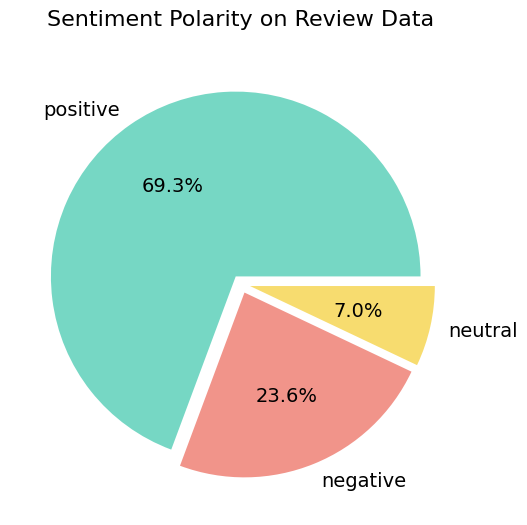

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))

sizes = df_idx['polarity'].value_counts().values
labels = df_idx['polarity'].value_counts().index

colors = ['#76D7C4', '#F1948A', '#F7DC6F']
explode = (0.05, 0.05, 0.05)

ax.pie(
    x=sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    textprops={'fontsize': 14}
)

ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

In [17]:
pd.set_option('display.max_colwidth', 5000)

# Semua data
all_tweets = df_idx.copy()

# Positif
positive_tweets = df_idx[df_idx['polarity'] == 'positive'].copy()
positive_tweets = positive_tweets[['filtered', 'polarity_score', 'polarity']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False).reset_index(drop=True)
positive_tweets.index += 1

# Negatif
negative_tweets = df_idx[df_idx['polarity'] == 'negative'].copy()
negative_tweets = negative_tweets[['filtered', 'polarity_score', 'polarity']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True).reset_index(drop=True)
negative_tweets.index += 1

# Netral
neutral_tweets = df_idx[df_idx['polarity'] == 'neutral'].copy()
neutral_tweets = neutral_tweets[['filtered', 'polarity_score', 'polarity']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False).reset_index(drop=True)
neutral_tweets.index += 1

# Fungsi untuk membuat Word Cloud
def generate_wordcloud(df, title='Word Cloud'):
    list_words = ''
    for tweet in df['filtered']:
        for word in tweet:
            list_words += ' ' + word

    wordcloud = WordCloud(width=800, height=500, background_color='white', min_font_size=10).generate(list_words)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=18)
    ax.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

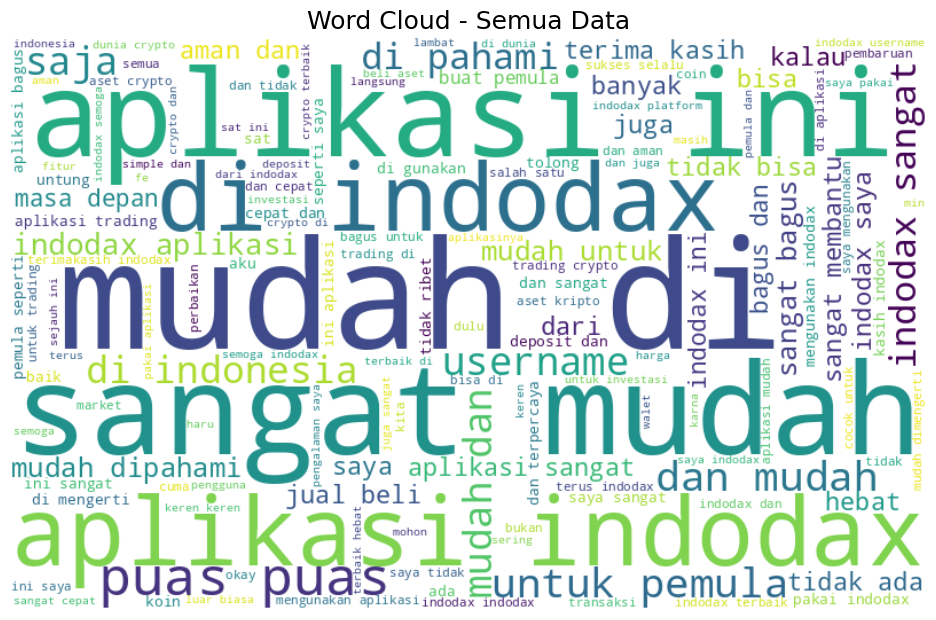

In [18]:
generate_wordcloud(all_tweets, 'Word Cloud - Semua Data')

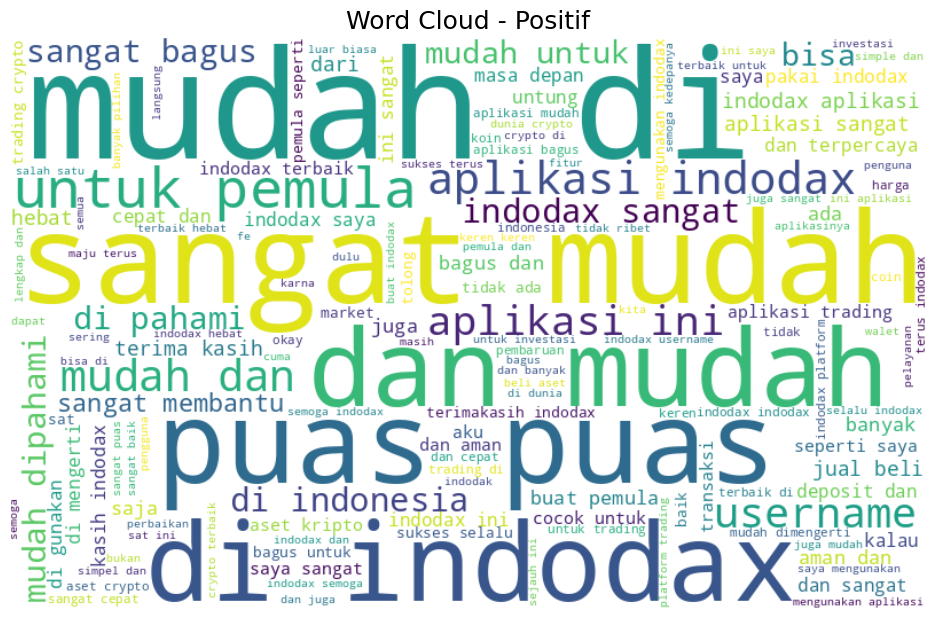

In [19]:
generate_wordcloud(positive_tweets, 'Word Cloud - Positif')

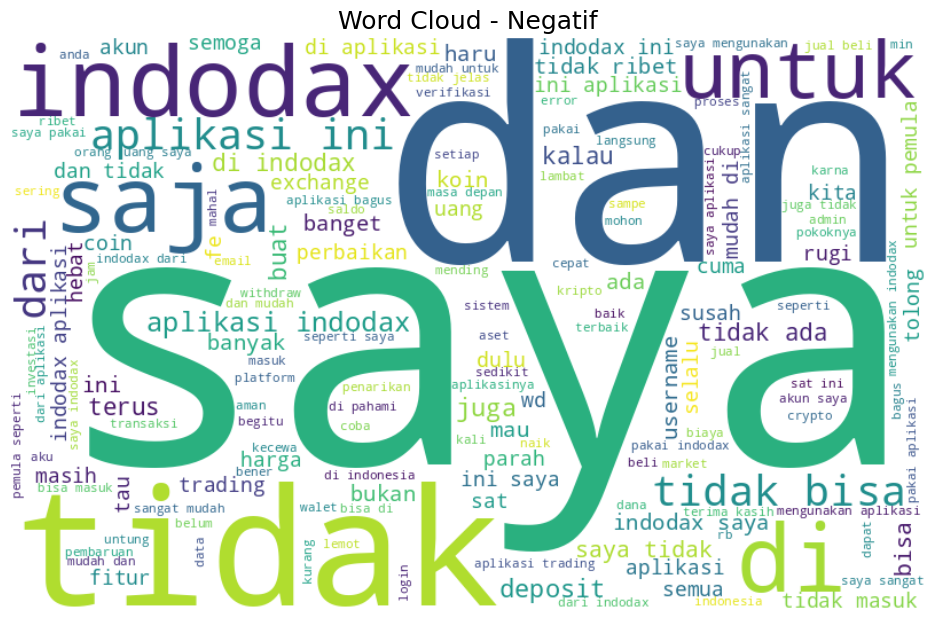

In [20]:
generate_wordcloud(negative_tweets, 'Word Cloud - Negatif')

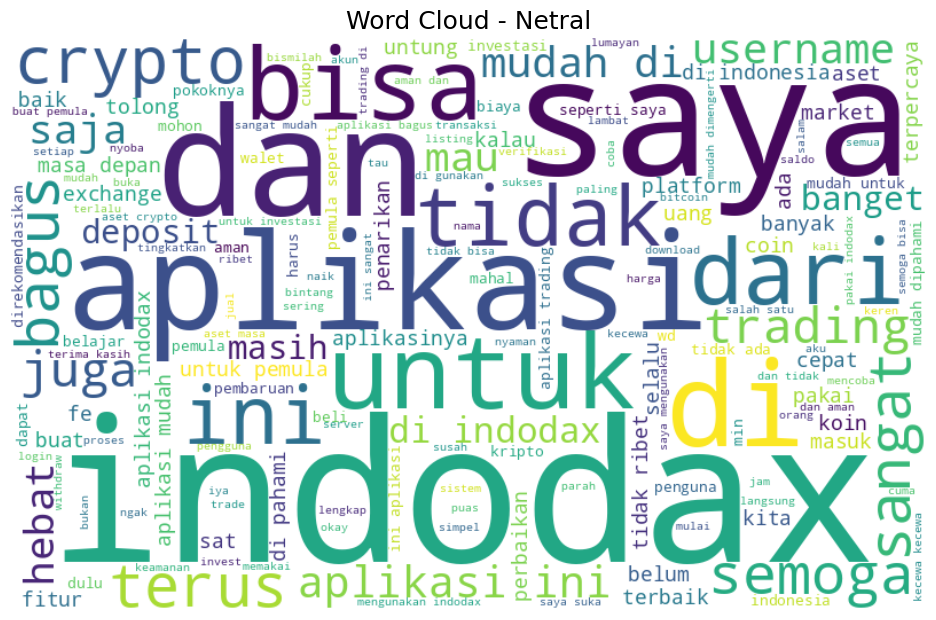

In [21]:
generate_wordcloud(neutral_tweets, 'Word Cloud - Netral')

<ipython-input-22-01734cee42c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#7FC97F', '#FDC086', '#BEAED4'])


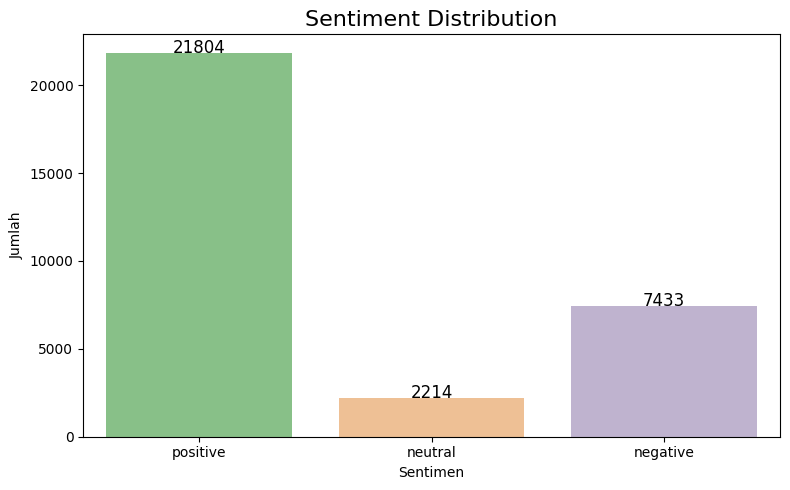

In [22]:
from collections import Counter

sentiment_counts = df_idx['polarity'].value_counts().reindex(['positive', 'neutral', 'negative'])

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#7FC97F', '#FDC086', '#BEAED4'])

for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + 3, str(v), ha='center', fontsize=12)

plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

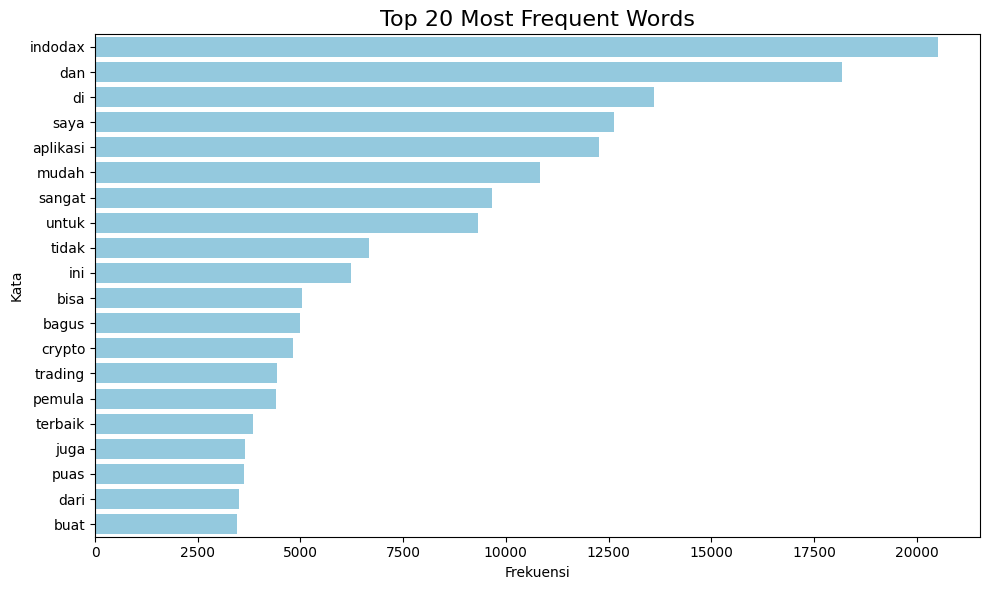

In [23]:
all_words = [word for tweet in df_idx['filtered'] for word in tweet]

word_freq = Counter(all_words)

common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), color='skyblue')
plt.title('Top 20 Most Frequent Words', fontsize=16)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()

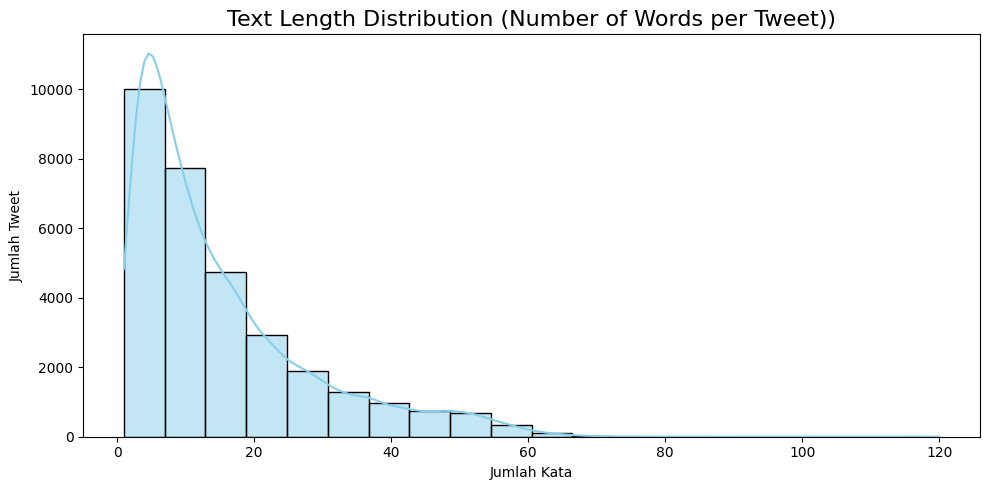

In [24]:
df_idx['text_length'] = df_idx['filtered'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df_idx['text_length'], bins=20, kde=True, color='skyblue')
plt.title('Text Length Distribution (Number of Words per Tweet))', fontsize=16)
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Tweet')
plt.tight_layout()
plt.show()

In [25]:
def map_score(score):
    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

df_idx['score'] = df_idx['polarity_score'].apply(map_score)
df_idx

,content,clean_text,clean_slang,tokenize,filtered,Last_txt,polarity_score,polarity,text_length,score
0,Indodax 3.0 semakin memudahkan pengguna dalam bertransaksi dan mengelola aset kripto. Antarmuka yang lebih intuitif dan fitur-fitur baru yang inovatif membuat pengalaman trading jadi lebih menyenangkan. Terima kasih Indodax atas pembaruan yang luar biasa ini! #AsetMasaDepan,indodax semakin memudahkan penguna dalam bertransaksi dan mengelola aset kripto antarmuka yang lebih intuitif dan fiturfitur baru yang inovatif membuat pengalaman trading jadi lebih menyenangkan terima kasih indodax atas pembaruan yang luar biasa ini,indodax semakin memudahkan penguna dalam bertransaksi dan mengelola aset kripto antarmuka yang lebih intuitif dan fiturfitur baru yang inovatif membuat pengalaman trading jadi lebih menyenangkan terima kasih indodax atas pembaruan yang luar biasa ini,"['indodax', 'semakin', 'memudahkan', 'penguna', 'dalam', 'bertransaksi', 'dan', 'mengelola', 'aset', 'kripto', 'antarmuka', 'yang', 'lebih', 'intuitif', 'dan', 'fiturfitur', 'baru', 'yang', 'inovatif', 'membuat', 'pengalaman', 'trading', 'jadi', 'lebih', 'menyenangkan', 'terima', 'kasih', 'indodax', 'atas', 'pembaruan', 'yang', 'luar', 'biasa', 'ini']","[indodax, memudahkan, penguna, bertransaksi, dan, mengelola, aset, kripto, antarmuka, intuitif, dan, fiturfitur, inovatif, pengalaman, trading, menyenangkan, terima, kasih, indodax, pembaruan, luar, biasa, ini]",indodax memudahkan penguna bertransaksi dan mengelola aset kripto antarmuka intuitif dan fiturfitur inovatif pengalaman trading menyenangkan terima kasih indodax pembaruan luar biasa ini,25,positive,23,1
1,kenapa setiap kali mau verifikasi selalu salah pada kontak darurat padahal suda berkali kali di ganti dari nomer ibu istri adik tapi salah terus min tolong batu dulu... ketika selesai baru kasi binta 5,kenapa setiap kali mau verifikasi selalu salah pada kontak darurat padahal suda berkali kali di ganti dari nomer ibu istri adik tapi salah terus min tolong batu dulu ketika selesai baru kasi binta,kenapa setiap kali mau verifikasi selalu salah pada kontak darurat padahal suda berkali kali di ganti dari nomer ibu istri adik tapi salah terus min tolong batu dulu ketika selesai baru kasi bintang,"['kenapa', 'setiap', 'kali', 'mau', 'verifikasi', 'selalu', 'salah', 'pada', 'kontak', 'darurat', 'padahal', 'suda', 'berkali', 'kali', 'di', 'ganti', 'dari', 'nomer', 'ibu', 'istri', 'adik', 'tapi', 'salah', 'terus', 'min', 'tolong', 'batu', 'dulu', 'ketika', 'selesai', 'baru', 'kasi', 'bintang']","[setiap, kali, mau, verifikasi, selalu, salah, kontak, darurat, suda, berkali, kali, di, ganti, dari, nomer, istri, adik, salah, terus, min, tolong, batu, dulu, selesai, kasi, bintang]",setiap kali mau verifikasi selalu salah kontak darurat suda berkali kali di ganti dari nomer istri adik salah terus min tolong batu dulu selesai kasi bintang,-1,negative,26,-1
2,tolong di tambahkan fitur penarikan lewat APK DANA,tolong di tambahkan fitur penarikan lewat apk dana,tolong di tambahkan fitur penarikan lewat aplikasi dana,"['tolong', 'di', 'tambahkan', 'fitur', 'penarikan', 'lewat', 'aplikasi', 'dana']","[tolong, di, tambahkan, fitur, penarikan, aplikasi, dana]",tolong di tambahkan fitur penarikan aplikasi dana,3,positive,7,1
3,"Buat tim Indodax, tolonglah untuk pembelian dan penjualan koin responnya dipercepat, katanya exchange terbesar di Indonesia, masa respon transaksinya kalah sama apk yang lain",buat tim indodax tolonglah untuk pembelian dan penjualan koin responya dipercepat katanya exchange terbesar di indonesia masa respon transaksinya kalah sama apk yang lain,buat tim indodax tolonglah untuk pembelian dan penjualan koin responya dipercepat katanya exchange terbesar di indonesia masa respon transaksinya kalah sama aplikasi yang lain,"['buat', 'tim', 'indodax', 'tolonglah', 'untuk', 'pembelian', 'dan', 'penjualan', 'koin', 'responya', 'dipercepat', 'katanya', 'exchange', 'terbesar', 'di', 'indonesia', 'masa', 'respon', 

#**Modeling**

##**Random Forest + TF-IDF + Split 60/40**

In [26]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df_idx['Last_txt'])
y = df_idx['score']

In [27]:
from imblearn.over_sampling import SMOTE

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.40, random_state=42, stratify=y)

# Terapkan smote ke training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"Ukuran data pelatihan: {X_train.shape[0]}")
print(f"Ukuran data pengujian: {X_test.shape[0]}")

Ukuran data pelatihan: 18870
Ukuran data pengujian: 12581


In [28]:
# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Akurasi Train : 0.9993
Akurasi Test  : 0.8439
Precision     : 0.8389
Recall        : 0.8439
F1 Score      : 0.8341

Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.63      0.72      2973
           0       0.72      0.45      0.55       886
           1       0.85      0.96      0.90      8722

    accuracy                           0.84     12581
   macro avg       0.80      0.68      0.72     12581
weighted avg       0.84      0.84      0.83     12581



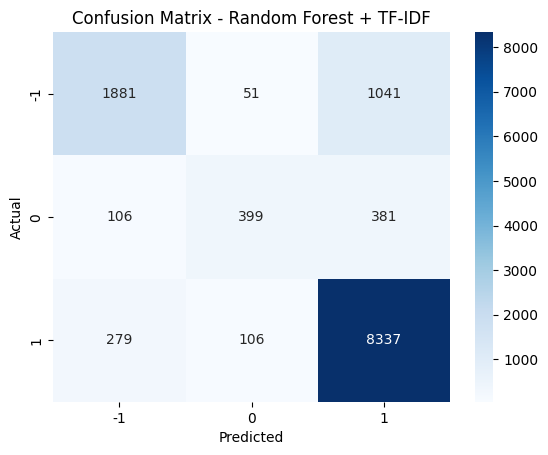

In [29]:
# Prediksi
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluasi
train_acc_rf = accuracy_score(y_train, y_pred_train)
test_acc_rf = accuracy_score(y_test, y_pred_test)
prec_rf = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
rec_rf = recall_score(y_test, y_pred_test, average='weighted')
f1_rf = f1_score(y_test, y_pred_test, average='weighted')

# Print hasil
print(f"Akurasi Train : {train_acc_rf:.4f}")
print(f"Akurasi Test  : {test_acc_rf:.4f}")
print(f"Precision     : {prec_rf:.4f}")
print(f"Recall        : {rec_rf:.4f}")
print(f"F1 Score      : {f1_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.title("Confusion Matrix - Random Forest + TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##**SVM + TF-IDF + 70/30**

In [30]:
# Siapkan fitur dan label
X = df_idx['Last_txt']
y = df_idx['score']

In [31]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

print(f"Ukuran data pelatihan: {X_train.shape[0]}")
print(f"Ukuran data pengujian: {X_test.shape[0]}")

Ukuran data pelatihan: 22015
Ukuran data pengujian: 9436


In [33]:
# Buat dan latih model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [34]:
# Prediksi
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

Akurasi Train : 0.9542
Akurasi Test  : 0.9175
Precision     : 0.9119
Recall        : 0.9175
F1 Score      : 0.9122

Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.90      0.89      2230
           0       0.72      0.45      0.55       664
           1       0.94      0.97      0.96      6542

    accuracy                           0.92      9436
   macro avg       0.85      0.77      0.80      9436
weighted avg       0.91      0.92      0.91      9436



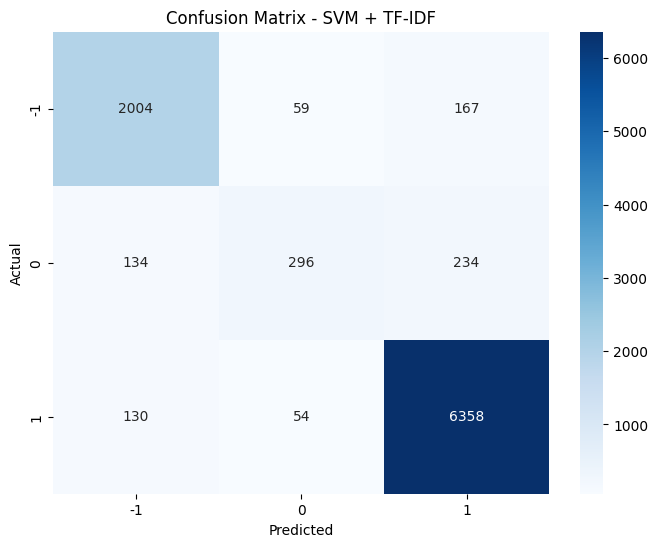

In [35]:
# 6. Evaluasi
train_acc_svm = accuracy_score(y_train, y_pred_train)
test_acc_svm = accuracy_score(y_test, y_pred_test)
precision_svm = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, y_pred_test, average='weighted')
f1_svm = f1_score(y_test, y_pred_test, average='weighted')

# Print hasil
print(f"Akurasi Train : {train_acc_svm:.4f}")
print(f"Akurasi Test  : {test_acc_svm:.4f}")
print(f"Precision     : {precision_svm:.4f}")
print(f"Recall        : {recall_svm:.4f}")
print(f"F1 Score      : {f1_svm:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test))

# 8. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.title('Confusion Matrix - SVM + TF-IDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##**MLP + TF-IDF + 65/35**

In [36]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X.astype(str)).toarray()

label_mapping = {-1: 0, 0: 1, 1: 2}
reverse_mapping = {0: -1, 1: 0, 2: 1}
y_encoded = y.map(label_mapping)

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.35, random_state=42, stratify=y_encoded)

print(f"Ukuran data pelatihan: {X_train.shape[0]}")
print(f"Ukuran data pengujian: {X_test.shape[0]}")

Ukuran data pelatihan: 20443
Ukuran data pengujian: 11008


In [38]:
from keras.optimizers import Adam
from keras.layers import BatchNormalization

# Buat dan latih model MLP
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(3, activation='softmax')  # 3 kelas
])

optimizer = Adam(learning_rate=0.0005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,710,531 (10.34 MB)

 Trainable params: 2,709,507 (10.34 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [39]:
# Training
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.7640 - loss: 0.5839 - val_accuracy: 0.8181 - val_loss: 0.5974
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.9176 - loss: 0.2250 - val_accuracy: 0.8880 - val_loss: 0.3225
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.9468 - loss: 0.1435 - val_accuracy: 0.8836 - val_loss: 0.3137
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.9668 - loss: 0.1013 - val_accuracy: 0.8778 - val_loss: 0.3623
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9778 - loss: 0.0673 - val_accuracy: 0.8831 - val_loss: 0.4088
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9849 - loss: 0.0441 - val_accuracy: 0.8841 - val_loss: 0.4338
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9829 - loss: 0.0484 - val_accuracy: 0.8768 - val_loss: 0.4873
Epoch 8/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9874 - loss: 0.0349 - 

639/639 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Akurasi Train : 0.9871
Akurasi Test  : 0.8910
Precision     : 0.8900
Recall        : 0.8910
F1 Score      : 0.8902

Classification Report:

              precision    recall  f1-score   support

          -1       0.83      0.87      0.85      2602
           0       0.54      0.49      0.52       775
           1       0.95      0.94      0.94      7631

    accuracy                           0.89     11008
   macro avg       0.77      0.77      0.77     11008
weighted avg       0.89      0.89      0.89     11008



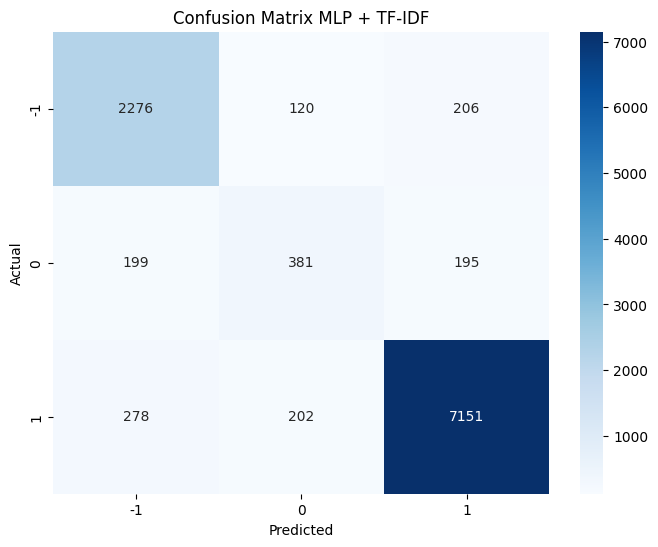

In [40]:
# Prediksi
y_pred_train = np.argmax(model.predict(X_train), axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1)

y_train_final = y_train.replace(reverse_mapping)
y_test_final = y_test.replace(reverse_mapping)
y_pred_train_final = pd.Series(y_pred_train).replace(reverse_mapping)
y_pred_test_final = pd.Series(y_pred_test).replace(reverse_mapping)

# Evaluasi
print(f"Akurasi Train : {accuracy_score(y_train_final, y_pred_train_final):.4f}")
print(f"Akurasi Test  : {accuracy_score(y_test_final, y_pred_test_final):.4f}")
print(f"Precision     : {precision_score(y_test_final, y_pred_test_final, average='weighted', zero_division=0):.4f}")
print(f"Recall        : {recall_score(y_test_final, y_pred_test_final, average='weighted'):.4f}")
print(f"F1 Score      : {f1_score(y_test_final, y_pred_test_final, average='weighted'):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test_final, y_pred_test_final))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_final, y_pred_test_final), annot=True, fmt='d', cmap='Blues',
            xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.title('Confusion Matrix MLP + TF-IDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **simpleRNN + BoW + 70/30**

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

X = df_idx['Last_txt']
y = df_idx['score']

vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(X).toarray()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bow, y_enc, test_size=0.3, random_state=42, stratify=y_enc)

X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print(f"Ukuran data pelatihan: {X_train.shape[0]}")
print(f"Ukuran data pengujian: {X_test.shape[0]}")

Ukuran data pelatihan: 22015
Ukuran data pengujian: 9436


In [43]:
# Buat dan latih model simpleRNN
model = Sequential([
    Input(shape=(1, X_train.shape[1])),  # input_shape=(timesteps, features)
    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(64),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 kelas
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 128)         │       656,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671,043 (2.56 MB)

 Trainable params: 671,043 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Training
history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7856 - loss: 0.5487 - val_accuracy: 0.9042 - val_loss: 0.2675
Epoch 2/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9235 - loss: 0.2177 - val_accuracy: 0.9264 - val_loss: 0.2414
Epoch 3/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9516 - loss: 0.1384 - val_accuracy: 0.9210 - val_loss: 0.2641
Epoch 4/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9635 - loss: 0.1104 - val_accuracy: 0.9246 - val_loss: 0.3006
Epoch 5/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9693 - loss: 0.0910 - val_accuracy: 0.9124 - val_loss: 0.3476
Epoch 6/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9743 - loss: 0.0842 - val_accuracy: 0.9192 - val_loss: 0.3537
Epoch 7/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9781 - loss: 0.0639 - val_accuracy: 0.9233 - val_loss: 0.3728
Epoch 8/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9825 - loss: 0.0584 - val_a

295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
688/688 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Akurasi Train : 0.9900
Akurasi Test  : 0.9142
Precision     : 0.9137
Recall        : 0.9142
F1 Score      : 0.9138

Classification Report:

              precision    recall  f1-score   support

     Negatif       0.90      0.87      0.89      2230
      Netral       0.59      0.58      0.59       664
     Positif       0.95      0.96      0.96      6542

    accuracy                           0.91      9436
   macro avg       0.81      0.81      0.81      9436
weighted avg       0.91      0.91      0.91      9436



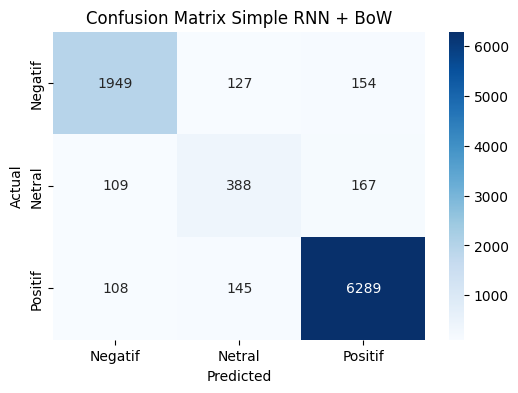

In [45]:
# Prediksi
y_pred_test = np.argmax(model.predict(X_test_rnn), axis=1)
y_pred_train = np.argmax(model.predict(X_train_rnn), axis=1)

# Hitung metrik
train_acc_rnn = accuracy_score(y_train, y_pred_train)
test_acc_rnn = accuracy_score(y_test, y_pred_test)
precision_rnn = precision_score(y_test, y_pred_test, average='weighted')
recall_rnn = recall_score(y_test, y_pred_test, average='weighted')
f1_rnn = f1_score(y_test, y_pred_test, average='weighted')

# Print
print(f"Akurasi Train : {train_acc_rnn:.4f}")
print(f"Akurasi Test  : {test_acc_rnn:.4f}")
print(f"Precision     : {precision_rnn:.4f}")
print(f"Recall        : {recall_rnn:.4f}")
print(f"F1 Score      : {f1_rnn:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test, target_names=['Negatif', 'Netral', 'Positif']))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Simple RNN + BoW')
plt.show()

In [62]:
# Buat dataframe ringkasan hasil
dtframe = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'MLP', 'Simple RNN'],
    'Accuracy Train': [train_acc_rf, train_acc_svm, accuracy_score(y_train_final, y_pred_train_final), train_acc_rnn],
    'Accuracy Test': [test_acc_rf, test_acc_svm, accuracy_score(y_test_final, y_pred_test_final), test_acc_rnn]
})

# Urutkan berdasarkan akurasi test
results_df = dtframe[['Model', 'Accuracy Test']]
print(results_df)

           Model  Accuracy Test
0  Random Forest       0.843892
1            SVM       0.917550
2            MLP       0.890988
3     Simple RNN       0.914159


In [64]:
# Mengurutkan berdasarkan akurasi test tertinggi
accuracy_test_sorted = results_df.sort_values(by='Accuracy Test',  ascending=False).reset_index(drop=True)
print("\nUrutan Model Berdasarkan Akurasi Test Tertinggi:\n")
print(accuracy_test_sorted)


Urutan Model Berdasarkan Akurasi Test Tertinggi:

           Model  Accuracy Test
0            SVM       0.917550
1     Simple RNN       0.914159
2            MLP       0.890988
3  Random Forest       0.843892


# **Inference**

In [68]:
def predict_sentiment_svm_interaktif():
    while True:
        # Minta input dari user
        text = input("Masukkan teks untuk dianalisis sentimennya (atau ketik 'exit' untuk keluar): ")
        if text.lower() == 'exit':
            print("Selesai.")
            break

        # Transformasi dengan TF-IDF
        text_tfidf = tfidf.transform([text])

        # Prediksi
        prediction = svm_model.predict(text_tfidf)[0]
        if prediction == -1:
            label = "Negatif"
        elif prediction == 0:
            label = "Netral"
        else:
            label = "Positif"

        print(f"Prediksi sentimen: {label}\n")

predict_sentiment_svm_interaktif()

Masukkan teks untuk dianalisis sentimennya (atau ketik 'exit' untuk keluar): oke
Prediksi sentimen: Netral

Masukkan teks untuk dianalisis sentimennya (atau ketik 'exit' untuk keluar): sangat recommended
Prediksi sentimen: Positif

Masukkan teks untuk dianalisis sentimennya (atau ketik 'exit' untuk keluar): saya rugi terus disini
Prediksi sentimen: Negatif

Masukkan teks untuk dianalisis sentimennya (atau ketik 'exit' untuk keluar): exit
Selesai.
